In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

data = pd.read_csv('housing_in_london_yearly_variables.csv')
data.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,12/1/1999,33020.0,NaN,48922,0.0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,12/1/1999,21480.0,NaN,23620,3.0,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,12/1/1999,19568.0,NaN,23128,8.0,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,12/1/1999,18621.0,NaN,21386,18.0,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,12/1/1999,18532.0,NaN,20911,6.0,260317.0,NaN,NaN,NaN,1


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
median_salary,1049.0,2.797779e+04,6.412807e+03,15684.0,23857.00,27441.00,30932.00,61636.00
life_satisfaction,352.0,7.485057e+00,1.984513e-01,7.0,7.35,7.51,7.64,7.96
recycling_pct,859.0,2.689057e+01,1.290316e+01,0.0,17.00,27.00,37.00,55.00
population_size,1018.0,6.042576e+06,1.526810e+07,6581.0,224345.75,294603.50,4630098.50,66435550.00
number_of_jobs,931.0,3.188095e+06,8.058302e+06,47000.0,94500.00,157000.00,2217000.00,35750000.00
area_size,666.0,3.724903e+05,2.157060e+06,315.0,2960.00,4323.00,8220.00,13303728.00
no_of_houses,666.0,8.814682e+05,3.690376e+06,5009.0,87635.50,102402.00,126276.00,24172166.00
borough_flag,1071.0,6.470588e-01,4.781079e-01,0.0,0.00,1.00,1.00,1.00


In [3]:
# Checking for missing values
data.isnull().sum()

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        212
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

In [4]:
# Converting the date column
data['date'] = pd.to_datetime(data['date'])

Text(0.5, 1.0, 'Heatmap of the data')

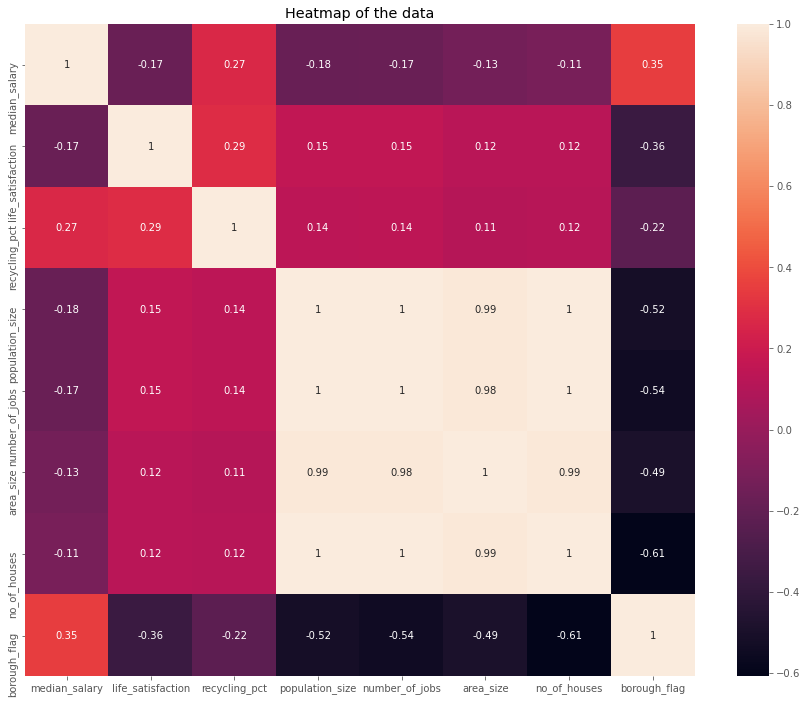

In [5]:
# Basic EDA
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True).set_title('Heatmap of the data')

Text(0.5, 1.0, 'Distribution of the median salary')

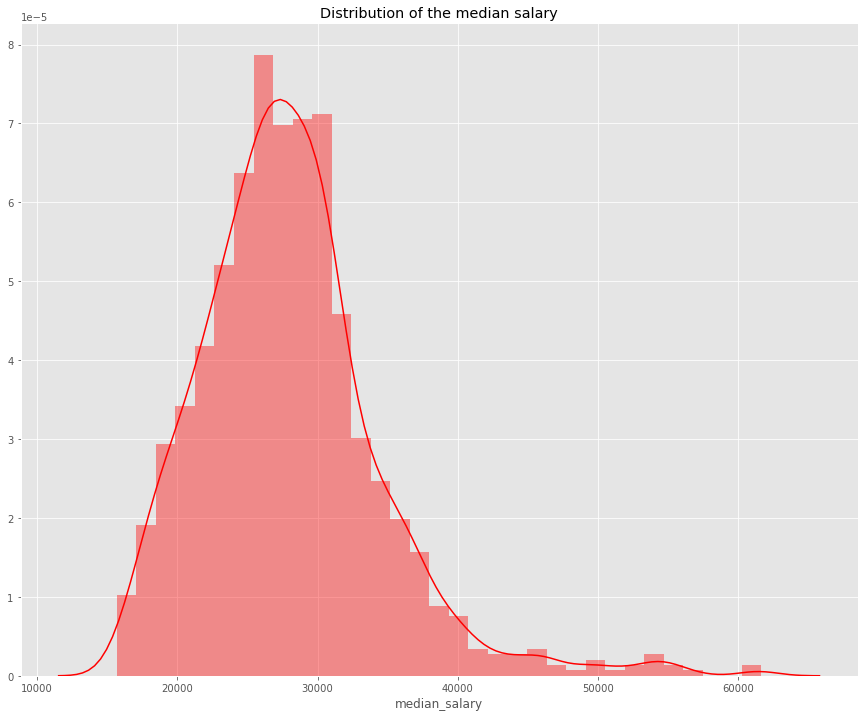

In [6]:
plt.figure(figsize=(15,12))
sns.distplot(data['median_salary'], color='red').set_title('Distribution of the median salary')

Text(0.5, 1.0, 'Distribution of Life Satisfaction')

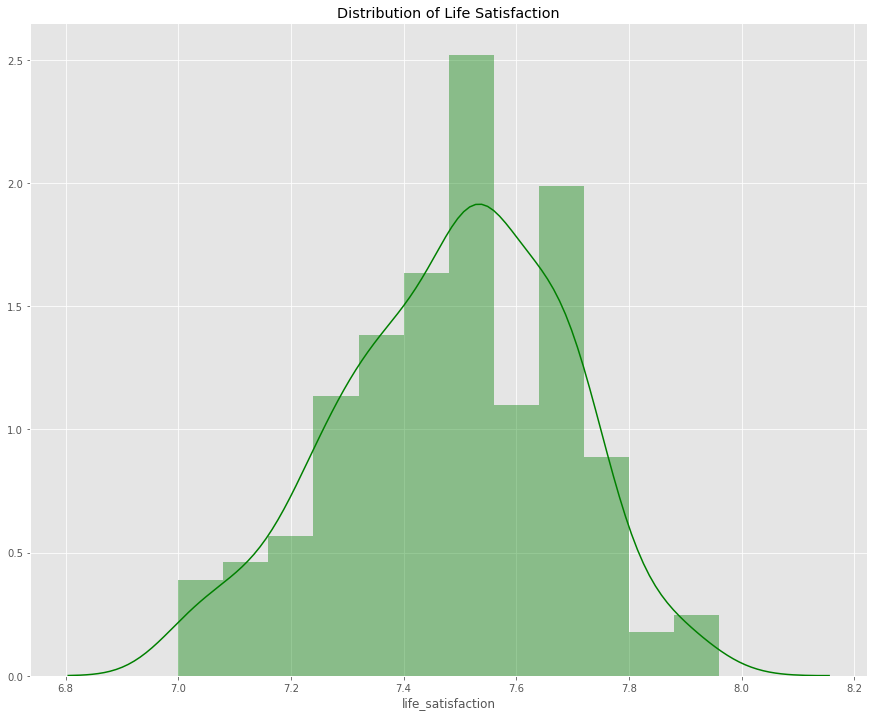

In [7]:
plt.figure(figsize=(15,12))
sns.distplot(data['life_satisfaction'], color='green').set_title('Distribution of Life Satisfaction')

Text(0.5, 1.0, 'Distribution of the Recycling')

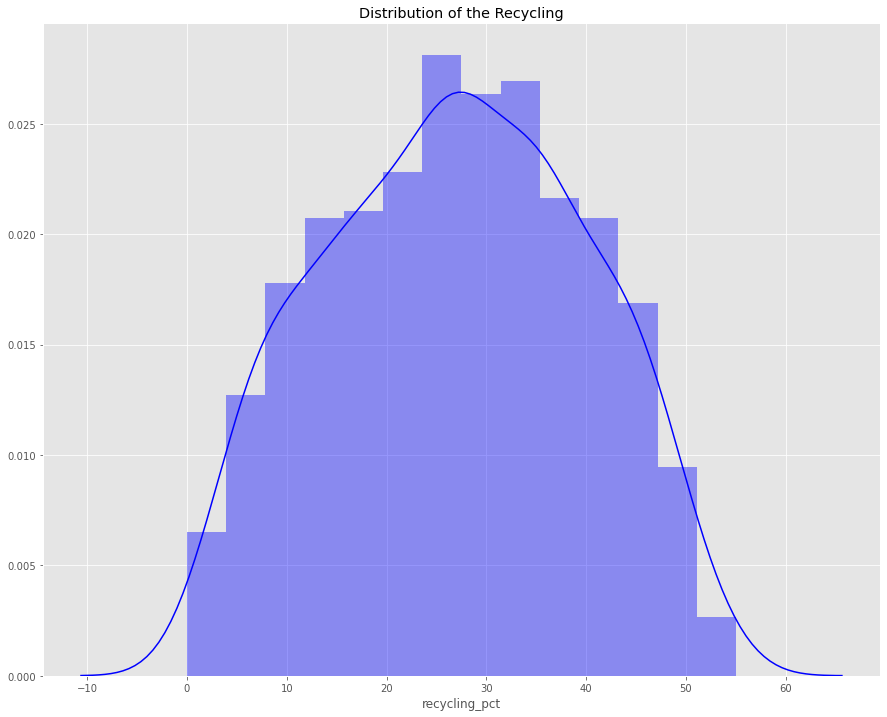

In [8]:
plt.figure(figsize=(15,12))
sns.distplot(data['recycling_pct'], color='blue').set_title('Distribution of the Recycling')

Text(0.5, 1.0, 'Count of the Borough Flag')

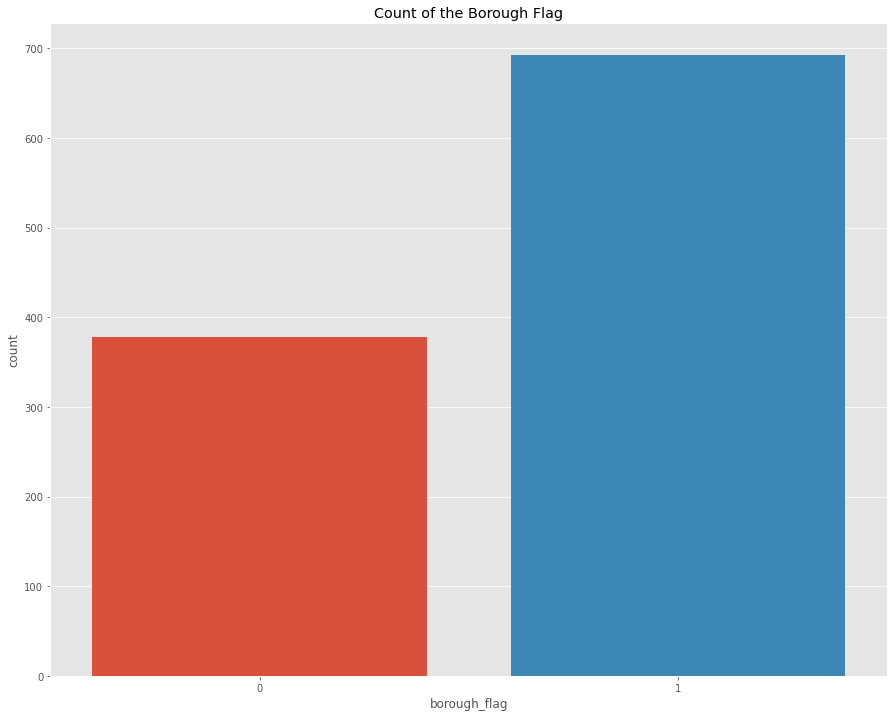

In [9]:
plt.figure(figsize=(15,12))
sns.countplot(data.borough_flag, saturation=0.9).set_title('Count of the Borough Flag')

In [10]:
# Dropping unnecessary columns
data = data.drop(['code', 'mean_salary'], 1)

In [11]:
data.isnull().sum()

area                   0
date                   0
median_salary         22
life_satisfaction    719
recycling_pct        212
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

In [12]:
# Filling missing values with their mean
data['median_salary'] = data['median_salary'].fillna(data['median_salary'].mean())
data['life_satisfaction'] = data['life_satisfaction'].fillna(data['life_satisfaction'].mean())
data['recycling_pct'] = data['recycling_pct'].fillna(data['recycling_pct'].mean())
data['population_size'] = data['population_size'].fillna(data['population_size'].mean())
data['number_of_jobs'] = data['number_of_jobs'].fillna(data['number_of_jobs'].mean())
data['area_size'] = data['area_size'].fillna(data['area_size'].mean())
data['no_of_houses'] = data['no_of_houses'].fillna(data['no_of_houses'].mean())

data.isnull().sum()

area                 0
date                 0
median_salary        0
life_satisfaction    0
recycling_pct        0
population_size      0
number_of_jobs       0
area_size            0
no_of_houses         0
borough_flag         0
dtype: int64

In [13]:
# Enocding the categorical column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['area'] = encoder.fit_transform(data['area'])

data['date'] = encoder.fit_transform(data['date'])

In [14]:
# Splitting to dependant and independant variables
X = data.drop('borough_flag', 1).values
y = data.borough_flag.values

In [17]:
# Splitting to train and test/validation sets
from sklearn.model_selection import KFold
kf = KFold()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {Y_test.shape}')

X_train shape: (857, 9)
X_test shape: (214, 9)
Y_train shape: (857,)
X_test shape: (214,)


In [18]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), SVC(),
            GaussianNB(), LogisticRegression()]

for model in estimators:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'{model} Accuracy: {accuracy}')
    print('='*100)

DecisionTreeClassifier() Accuracy: 0.8271028037383178
RandomForestClassifier() Accuracy: 0.8271028037383178
SVC() Accuracy: 0.8364485981308412
GaussianNB() Accuracy: 0.38317757009345793
LogisticRegression() Accuracy: 0.8738317757009346
